In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/shaozishan/Desktop/Research/Parallel Machine Learning/outputs/Poly_5_pyrim_cabdcd.csv")

# print the information of the data

In [4]:
data.info()

data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kernel               78 non-null     object 
 1    num_process         78 non-null     int64  
 2    s                   78 non-null     int64  
 3    blksize             78 non-null     int64  
 4    csr_setup_time      78 non-null     float64
 5    kernel_computation  78 non-null     float64
 6    allreduce_time      78 non-null     float64
 7    sample_time         78 non-null     float64
 8    csr_read_time       78 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 5.6+ KB


,num_process,s,blksize,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time
count,78.00000,78.000000,78.000000,78.000000,78.000000,7.800000e+01,7.800000e+01,78.000000
mean,10.50000,49.923077,21.538462,0.000175,0.000136,2.971709e-05,1.826146e-06,0.000250
std,10.89829,62.140346,17.137861,0.000038,0.000112,3.572655e-05,1.629783e-06,0.000039
min,1.00000,1.000000,10.000000,0.000137,0.000051,2.330000e-07,3.000000e-07,0.000215
25%,2.00000,3.000000,10.000000,0.000147,0.000054,4.332325e-06,5.694500e-07,0.000224
50%,6.00000,3.000000,10.000000,0.000162,0.000064,1.662410e-05,1.499300e-06,0.000232
75%,16.00000,90.000000,30.000000,0.000187,0.000209,4.841615e-05,2.280175e-06,0.000255
max,32.00000,180.000000,60.000000,0.000259,0.000398,1.748355e-04,8.689900e-06,0.000366


In [5]:
data[" allreduce_time"]
data[" blksize"].unique()

array([10, 20, 30, 40, 50, 60])

[10 20 30 40 50 60]
          0         1         2         3         4         5
0  0.164059  0.173198  0.161759  0.164319  0.175038  0.161627
1  0.050957  0.100449  0.148069  0.196054  0.235084  0.269387
2  0.067644  0.091424  0.180191  0.185742  0.166963  0.308038
3  0.083480  0.120768  0.146772  0.178478  0.219925  0.250577
4  0.169116  0.164457  0.165144  0.174519  0.163047  0.163717


/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2716/773471654.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prop_csr_setup_time'] = df[' csr_setup_time'] / df[' csr_setup_time'].sum()
/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2716/773471654.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prop_kernel_computation'] = df[' kernel_computation'] / df[' kernel_computation'].sum()
/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2716/773471654.py:20: Setti

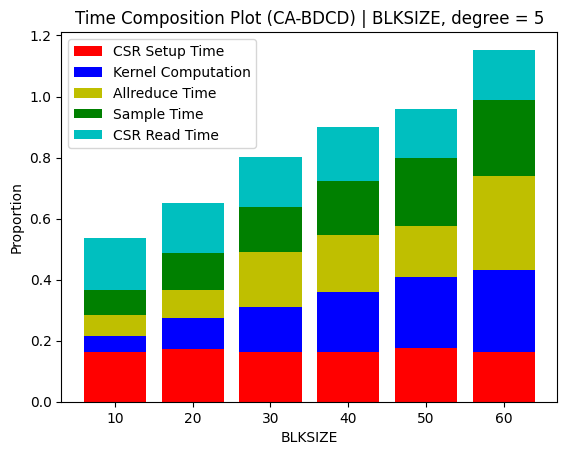

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
df = data[(data[' num_process'] == 8) & (data[' s'] == 3)]

# print(df.head())

print(df[" blksize"].unique())
# print(df)


# Calculate the proportions for each time variable
df['prop_csr_setup_time'] = df[' csr_setup_time'] / df[' csr_setup_time'].sum()
df['prop_kernel_computation'] = df[' kernel_computation'] / df[' kernel_computation'].sum()
df['prop_allreduce_time'] = df[' allreduce_time'] / df[' allreduce_time'].sum()
df['prop_sample_time'] = df[' sample_time'] / df[' sample_time'].sum()
df['prop_csr_read_time'] = df[' csr_read_time'] / df[' csr_read_time'].sum()




# Set the BLKSIZE as the x-axis labels
blksize_labels = df[' blksize'].astype(str)


# Set the bar plot data
bar_data = np.array([
    df['prop_csr_setup_time'].tolist(),
    df['prop_kernel_computation'].tolist(),
    df['prop_allreduce_time'].tolist(),
    df['prop_sample_time'].tolist(),
    df['prop_csr_read_time'].tolist()
])

print(pd.DataFrame(bar_data).head())

# bar_data = pd.DataFrame(bar_data)



# make the graph (stacked bar chart)

# create data
x = ['A', 'B', 'C', 'D']
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(blksize_labels, y1, color='r')
plt.bar(blksize_labels, y2, bottom=y1, color='b')
plt.bar(blksize_labels, y3, bottom=y1+y2, color='y')
plt.bar(blksize_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(blksize_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('BLKSIZE')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | BLKSIZE, degree = 5')
plt.show()

In [24]:

# divide the running time to csr
normalized = df[df.columns[4:9]]

print(normalized.head())


normalized.sum()

print(normalized.sum(axis = 1))


rowsum = normalized.sum(axis = 1)

for i in range(6):
    normalized[i, :] = normalized[i, :] / rowsum[i]
    

print(normalized.head())

# print(normalized / normalized.sum(axis=1))


     csr_setup_time   kernel_computation   allreduce_time   sample_time   
45         0.000152             0.000068         0.000018      0.000001  \
51         0.000160             0.000133         0.000024      0.000002   
57         0.000150             0.000196         0.000047      0.000002   
63         0.000152             0.000260         0.000049      0.000002   
69         0.000162             0.000312         0.000044      0.000003   

     csr_read_time  
45        0.000232  
51        0.000226  
57        0.000227  
63        0.000240  
69        0.000224  
45    0.000470
51    0.000545
57    0.000622
63    0.000702
69    0.000744
75    0.000815
dtype: float64


InvalidIndexError: (0, slice(None, None, None))

## Stacked Bar Chart

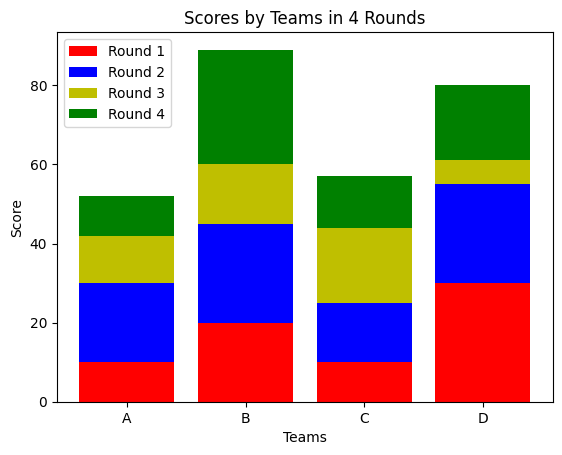

In [ ]:
# create data
x = ['A', 'B', 'C', 'D']
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

## Plot by s

   kernel   num_process    s   blksize   csr_setup_time   kernel_computation   
3    poly             8    1        10         0.000143             0.000061  \
9    poly             8   30        10         0.000148             0.000056   
15   poly             8   60        10         0.000149             0.000053   
21   poly             8   90        10         0.000168             0.000053   
27   poly             8  120        10         0.000158             0.000051   

     allreduce_time   sample_time   csr_read_time  
3          0.000067  1.935700e-06        0.000216  
9          0.000007  4.902000e-07        0.000226  
15         0.000007  4.605000e-07        0.000225  
21         0.000007  4.691000e-07        0.000225  
27         0.000014  4.475000e-07        0.000226  
          0         1         2         3         4         5         6   
0  0.115859  0.120403  0.120621  0.136661  0.128379  0.131608  0.123287  \
1  0.136677  0.125682  0.119391  0.119055  0.115263  0.11

/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2078/49956911.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prop_csr_setup_time'] = df[' csr_setup_time'] / df[' csr_setup_time'].sum()
/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2078/49956911.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prop_kernel_computation'] = df[' kernel_computation'] / df[' kernel_computation'].sum()
/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2078/49956911.py:20: SettingW

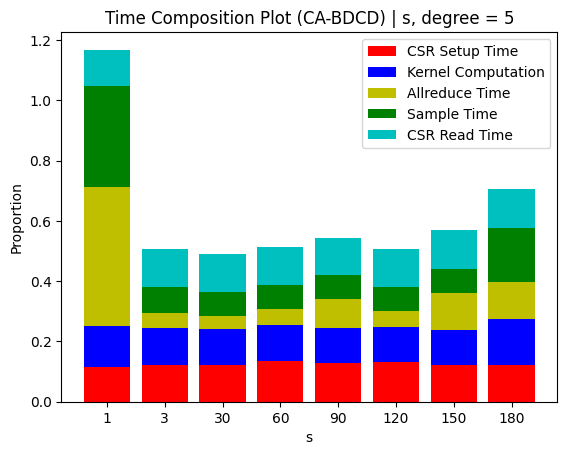

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
df = data[(data[' num_process'] == 8) & (data[' blksize'] == 10)]

print(df.head())

# print(df[" blksize"].unique())
# print(df)


# Calculate the proportions for each time variable
df['prop_csr_setup_time'] = df[' csr_setup_time'] / df[' csr_setup_time'].sum()
df['prop_kernel_computation'] = df[' kernel_computation'] / df[' kernel_computation'].sum()
df['prop_allreduce_time'] = df[' allreduce_time'] / df[' allreduce_time'].sum()
df['prop_sample_time'] = df[' sample_time'] / df[' sample_time'].sum()
df['prop_csr_read_time'] = df[' csr_read_time'] / df[' csr_read_time'].sum()

# Set the BLKSIZE as the x-axis labels
s_labels = df[' s'].sort_values().astype(str)


# Set the bar plot data
bar_data = np.array([
    df['prop_csr_setup_time'].tolist(),
    df['prop_kernel_computation'].tolist(),
    df['prop_allreduce_time'].tolist(),
    df['prop_sample_time'].tolist(),
    df['prop_csr_read_time'].tolist()
])

print(pd.DataFrame(bar_data).head())

# bar_data = pd.DataFrame(bar_data)



# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(s_labels, y1, color='r')
plt.bar(s_labels, y2, bottom=y1, color='b')
plt.bar(s_labels, y3, bottom=y1+y2, color='y')
plt.bar(s_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(s_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('s')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | s, degree = 5')
plt.show()

## Plot by process

   kernel   num_process   s   blksize   csr_setup_time   kernel_computation   
6    poly             1  30        10         0.000259             0.000064  \
7    poly             2  30        10         0.000176             0.000063   
8    poly             4  30        10         0.000173             0.000055   
9    poly             8  30        10         0.000148             0.000056   
10   poly            16  30        10         0.000145             0.000055   

     allreduce_time   sample_time   csr_read_time  
6      3.840000e-07  1.514100e-06        0.000326  
7      2.310500e-06  1.042900e-06        0.000254  
8      6.327500e-06  6.053000e-07        0.000238  
9      7.053100e-06  4.902000e-07        0.000226  
10     2.034790e-05  4.247000e-07        0.000228  
          0         1         2         3         4         5
0  0.247127  0.167502  0.165303  0.141368  0.138353  0.140348
1  0.182450  0.178433  0.157771  0.159663  0.157430  0.164253
2  0.007195  0.043293  0.11

/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2078/3984731467.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prop_csr_setup_time'] = df[' csr_setup_time'] / df[' csr_setup_time'].sum()
/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2078/3984731467.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prop_kernel_computation'] = df[' kernel_computation'] / df[' kernel_computation'].sum()
/var/folders/zs/j1ychqfs6knf8_6dq27wpgr40000gn/T/ipykernel_2078/3984731467.py:20: Se

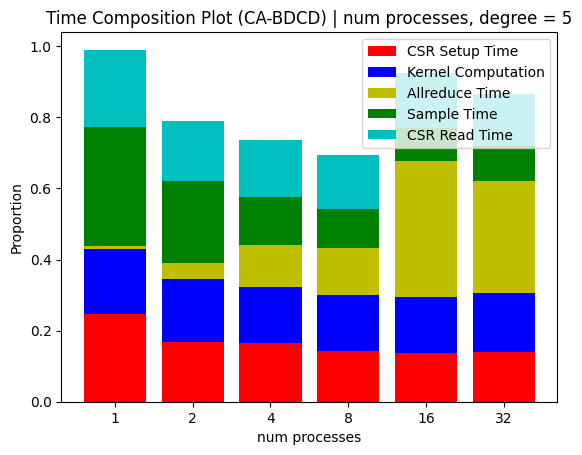

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = data

# group the data by the blksize
# in this case, let's focus on the data with process = 8, s = 3, and blksize range from 10 to 60
df = data[(data[' s'] == 30) & (data[' blksize'] == 10)]

print(df.head())

# print(df[" blksize"].unique())
# print(df)


# Calculate the proportions for each time variable
df['prop_csr_setup_time'] = df[' csr_setup_time'] / df[' csr_setup_time'].sum()
df['prop_kernel_computation'] = df[' kernel_computation'] / df[' kernel_computation'].sum()
df['prop_allreduce_time'] = df[' allreduce_time'] / df[' allreduce_time'].sum()
df['prop_sample_time'] = df[' sample_time'] / df[' sample_time'].sum()
df['prop_csr_read_time'] = df[' csr_read_time'] / df[' csr_read_time'].sum()

# Set the BLKSIZE as the x-axis labels
process_labels = df[' num_process'].sort_values().astype(str)


# Set the bar plot data
bar_data = np.array([
    df['prop_csr_setup_time'].tolist(),
    df['prop_kernel_computation'].tolist(),
    df['prop_allreduce_time'].tolist(),
    df['prop_sample_time'].tolist(),
    df['prop_csr_read_time'].tolist()
])

print(pd.DataFrame(bar_data).head())

# bar_data = pd.DataFrame(bar_data)



# make the graph (stacked bar chart)

# create data
y1 = bar_data[0]
y2 = bar_data[1]
y3 = bar_data[2]
y4 = bar_data[3]
y5 = bar_data[4]
 
# plot bars in stack manner
plt.bar(process_labels, y1, color='r')
plt.bar(process_labels, y2, bottom=y1, color='b')
plt.bar(process_labels, y3, bottom=y1+y2, color='y')
plt.bar(process_labels, y4, bottom=y1+y2+y3, color='g')
plt.bar(process_labels, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel('num processes')
plt.ylabel('Proportion')
plt.legend(['CSR Setup Time', 'Kernel Computation', 'Allreduce Time', 'Sample Time', 'CSR Read Time'])
plt.title('Time Composition Plot (CA-BDCD) | num processes, degree = 5')
plt.show()